In [48]:
from sklearn.svm import SVC
from get_samples import split_data
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay

In [49]:
X_train, X_test, y_train, y_test = split_data(True)

In [50]:
clf = SVC(kernel='linear', class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [51]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.3506876227897839
              precision    recall  f1-score   support

         CAM       0.35      0.36      0.35       391
          CB       0.57      0.67      0.61       293
         CDM       0.44      0.59      0.50       427
          CF       0.05      0.22      0.08        50
          CM       0.51      0.37      0.43       630
          LB       0.39      0.22      0.28       314
          LM       0.30      0.13      0.18       408
          LW       0.09      0.16      0.12       120
         LWB       0.06      0.42      0.11        36
          RB       0.30      0.20      0.24       301
          RM       0.30      0.08      0.13       452
          RW       0.11      0.28      0.16       119
         RWB       0.04      0.23      0.06        30
          ST       0.68      0.61      0.65       501

    accuracy                           0.35      4072
   macro avg       0.30      0.32      0.28      4072
weighted avg       0.41      0.35      0.36      40

We see that ST has and CB results are okey atleast. But the rests are pretty bad. Lets try over sample the classes.

In [52]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [53]:
clf.fit(X_train_resampled, y_train_resampled )
y_pred = clf.predict(X_test)

In [54]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.34577603143418467
              precision    recall  f1-score   support

         CAM       0.34      0.34      0.34       391
          CB       0.56      0.67      0.61       293
         CDM       0.43      0.58      0.50       427
          CF       0.05      0.22      0.08        50
          CM       0.50      0.36      0.42       630
          LB       0.39      0.26      0.31       314
          LM       0.29      0.12      0.17       408
          LW       0.09      0.15      0.11       120
         LWB       0.07      0.42      0.13        36
          RB       0.33      0.18      0.23       301
          RM       0.28      0.10      0.14       452
          RW       0.11      0.28      0.16       119
         RWB       0.04      0.27      0.06        30
          ST       0.68      0.58      0.63       501

    accuracy                           0.35      4072
   macro avg       0.30      0.32      0.28      4072
weighted avg       0.40      0.35      0.36      4

Did *NOT* increase the accuracy.

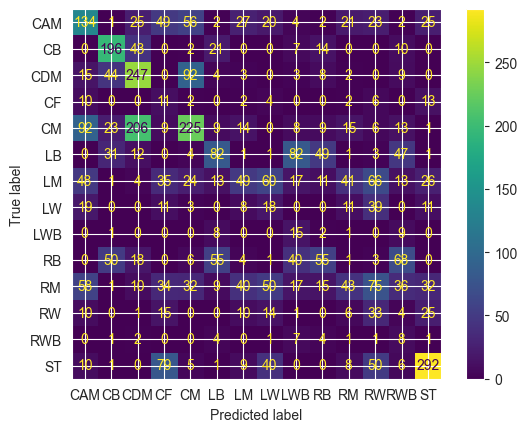

In [56]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

Notice the predictions, ex: CDM is predicted as both CDM and CM..